[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/matog/Flacso_ciencia_de_datos_python_2022/blob/main/Clase4/5%20-%20GIS.ipynb)


# GIS con GEOPANDAS 

https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG

Intro a sistemas de coordenadas y proyecciones: 
- [Video](https://www.youtube.com/watch?v=mNG2vIBs7bU) 
- [ArcGis](https://pro.arcgis.com/es/pro-app/latest/help/mapping/properties/coordinate-systems-and-projections.htm)
- [MappingGis](https://mappinggis.com/2022/02/diferencias-entre-los-sistemas-de-coordenadas-geograficas-y-proyectadas/)


### Carga de módulos

In [ ]:
# Librerias necesarias para librerías de goepython
!apt install gdal-bin python-gdal python3-gdal 
# Instalamos rtree (requerimiento de Geopandas)
!apt install python3-rtree 
# Instalamos Geopandas desde el repositorio, para tomar la última versión
# !pip install git+git://github.com/geopandas/geopandas.git
!pip install geopandas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Geopandas (http://geopandas.org/) hace posible trabajar con información geospacial en python de una forma relativamente sencilla. Combina la capacidad de analisis de Pandas con la de otros paquetes como shapely, para manegar información espacial.

Las estructuras de datos mas importantes en geopandas son las GeoSeries y los GeoDataframe, que extienda las posibildades de las Series y los DataFrames de pandas. Esto significa que podemos usar todos nuestros skills de pandas incluso cuando trabajamos con geopandas! 

La diferencia entre el geodataframe y el dataframe es que el geodataframe debe contener una columna para guardar las geometrias. Por defecto, el nombre de la columna es 'geometry'. Esta columna es una geoserie que contiene las geometrias (puntos, lineas, poligonos, multipoligonoes, etc) como objetos de shapely.

La carga es similar a un dataframe, con el comando `.read_file`.

In [2]:
# Departamentos de Argentina
gdf_depart = gpd.read_file('https://github.com/matog/Flacso_ciencia_de_datos_python_2022/blob/main/Clase4/data/departamento.zip?raw=true')
# Limites provinciales
gdf_prov = gpd.read_file('https://github.com/matog/Flacso_ciencia_de_datos_python_2022/blob/main/Clase4/data/provincia.zip?raw=true')

In [3]:
type(gdf_depart)

geopandas.geodataframe.GeoDataFrame

In [4]:
gdf_prov

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."
2,3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-58.88082 -28.06682, -58.88360..."
4,5,0.0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-65.42299 -30.11960, -65.49056..."
5,6,0.0,Provincia,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN,"MULTIPOLYGON (((-66.09976 -26.22049, -66.10088..."
6,7,0.0,Provincia,Provincia de Tucumán,Provincia,Tucumán,90,Geografía,IGN,"MULTIPOLYGON (((-64.49532 -26.21937, -64.49723..."
7,8,0.0,Provincia,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37764..."
8,9,0.0,Provincia,Provincia de Formosa,Provincia,Formosa,34,Geografía,IGN,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37935..."
9,10,0.0,Provincia,Provincia de Santa Cruz,Provincia,Santa Cruz,78,Geografía,IGN,"MULTIPOLYGON (((-71.54709 -45.99975, -71.54573..."


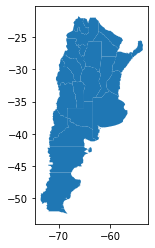

In [9]:
# gdf_prov.loc[gdf_prov['fna']=='Provincia del Neuquén']
gdf_prov.loc[gdf_prov['gid']!=23].plot();
# gdf_prov.plot();

### Geopandas Atributos 

    - area: superficie (en unidades de la proyección, ver https://geopandas.org/en/stable/docs/user_guide/projections.html)
    - bounds: tupla de las coordinadas max y min de cada eje
    - total_bounds: tupla de coordinadas max y min en cada eje, para el total de la geoserie
    - geom_type: tipo de geometría.
    - is_valid: testea si las coordinadsa forman una figura qeu es una figura geométrica razonable (de acuerdo a https://www.ogc.org/standards/sfa)

In [10]:
gdf_prov.loc[gdf_prov['nam'] == 'Catamarca'].is_valid

5    True
dtype: bool

In [11]:
gdf_prov.loc[gdf_prov['nam'] == 'Catamarca'].is_valid

5    True
dtype: bool

### Geopandas Métodos:

    - distance(): Devuelve una serie con la distancia mínima entre cada registro
    - centroid: devuelve una GeoSeries de centroides
    - representative_point(): devuelve una GeoSeries con puntos que se encuentran dentro de cada geometria. No devuelve centroides.
    - to_crs(): cambia el sistema de coordenadas
    - plot(): Grafica la geoserie.

In [12]:
gdf_prov.loc[gdf_prov['nam'] == 'Catamarca'].centroid

/tmp/ipykernel_15089/297715576.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_prov.loc[gdf_prov['nam'] == 'Catamarca'].centroid


5    POINT (-66.94769 -27.33589)
dtype: geometry

Vamos a intentar graficar un mapa [coropletico](https://es.wikipedia.org/wiki/Mapa_coropl%C3%A9tico), con la población 2010 de los departamentos de la provincia de Mendoza.

Mas arriba en este notebook cargamos los departamentos de toda la Argentina. Vamos a quedarnos solo con los de Mendoza

In [13]:
gdf_depart

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,2,Departamento,Departamento Federal,Departamento,Federal,30035,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57731 -30.69016, -58.57512..."
1,3,Departamento,Departamento Gualeguaychú,Departamento,Gualeguaychú,30056,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.13011 -33.02912, -58.13087..."
2,4,Departamento,Departamento Islas del Ibicuy,Departamento,Islas del Ibicuy,30063,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57589 -34.02675, -58.57593..."
3,5,Departamento,Departamento Victoria,Departamento,Victoria,30105,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-59.77158 -32.58791, -59.77198..."
4,6,Departamento,Departamento Diamante,Departamento,Diamante,30021,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-60.25784 -32.05170, -60.25723..."
...,...,...,...,...,...,...,...,...,...
524,502,Departamento,Departamento Iglesia,Departamento,Iglesia,70049,Direc. de Catastro,IGN,"MULTIPOLYGON (((-69.62981 -28.39369, -69.62956..."
525,503,Departamento,Departamento Jáchal,Departamento,Jáchal,70056,Direc. de Catastro,IGN,"MULTIPOLYGON (((-68.25879 -29.74673, -68.26262..."
526,504,Departamento,Departamento Valle Fértil,Departamento,Valle Fértil,70119,Direc. de Catastro,IGN,"MULTIPOLYGON (((-67.99199 -29.97924, -67.99151..."
527,505,Departamento,Partido de La Plata,Partido,La Plata,06441,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-57.99667 -34.87535, -57.99087..."


In [16]:
gdf_depart['fdc'].unique()

array(['ATER - Direc. de Catastro',
       'ARBA - Gerencia de Servicios Catastrales',
       'Servicio de Catastro e Información Territorial', 'IGN',
       'IDE Mendoza', 'Ministerio de Ecología',
       'Direc. de Geodesia y Catastro', 'Catastro Provinciales',
       'Direc. de Catastro', 'IDE Cordoba', 'IDE Chaco', 'IDE Tucuman',
       'Direc. Pcial. de Catastro y Cartografía', 'IDE Rio Negro',
       'IDE Salta', 'Direc. Grl. de Inmuebles',
       'Direc. Pcial. de Catastro e Inf. Territorial',
       'Direc. Grl. de Catastro', 'SCAR', 'Gerencia de Catastro Pcial.',
       'Catastro', 'IDE Catamarca'], dtype=object)

In [17]:
gdf_mendoza = gdf_depart.loc[gdf_depart['fdc'] == 'IDE Mendoza']

In [18]:
gdf_mendoza

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry
16,220,Departamento,Departamento Las Heras,Departamento,Las Heras,50049,IDE Mendoza,IGN,"MULTIPOLYGON (((-69.12645 -32.00191, -69.12570..."
31,213,Departamento,Departamento San Carlos,Departamento,San Carlos,50091,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.45348 -34.21255, -68.45584..."
32,214,Departamento,Departamento Tunuyán,Departamento,Tunuyán,50119,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.99859 -33.54164, -68.99862..."
78,92,Departamento,Departamento Tupungato,Departamento,Tupungato,50126,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.79835 -33.39054, -68.79835..."
83,52,Departamento,Departamento Santa Rosa,Departamento,Santa Rosa,50112,IDE Mendoza,IGN,"MULTIPOLYGON (((-67.95776 -32.84504, -67.95774..."
86,53,Departamento,Departamento Rivadavia,Departamento,Rivadavia,50084,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.28922 -33.23243, -68.29025..."
88,55,Departamento,Departamento La Paz,Departamento,La Paz,50042,IDE Mendoza,IGN,"MULTIPOLYGON (((-67.17696 -33.07321, -67.17605..."
133,111,Departamento,Departamento General Alvear,Departamento,General Alvear,50014,IDE Mendoza,IGN,"MULTIPOLYGON (((-66.75741 -34.51179, -66.75688..."
135,113,Departamento,Departamento San Rafael,Departamento,San Rafael,50105,IDE Mendoza,IGN,"MULTIPOLYGON (((-66.77655 -34.29767, -66.77665..."
168,215,Departamento,Departamento Luján de Cuyo,Departamento,Luján de Cuyo,50063,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.86869 -32.96118, -68.86828..."


<Figure size 2880x2160 with 0 Axes>

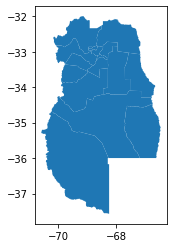

In [20]:
plt.figure(figsize=(40,30))
gdf_mendoza.plot();

In [21]:
tables = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Municipios_de_la_provincia_de_Mendoza', encoding='utf-8')

In [22]:
type(tables)

list

In [24]:
tables[0]

,Municipio (departamento),Cabecera,Fecha de creación del departamento,Origen,Códigos INDEC:divisiones político-administrativas/ gobiernos locales[2]​[3]​,Población (2010)[4]​,Superficie (km²),Densidad (hab./km²),Distritos,Delegaciones municipales,Mapa,Número de concejales
0,General Alvear,General Alvear,12 de agosto de 1914 (ley n.º 635)[5]​,Con tierras del departamento San Rafael,50014/500014,46 429,14 448,3.21,4,* Alvear Oeste* Bowen* San Pedro del Atuel[6]​,NaN,10
1,Godoy Cruz,Godoy Cruz,11 de mayo de 1855,Sus nombres anteriores fueron San Vicente y Be...,50021/500021,191 903,75,2558.71,9[7]​,NaN,NaN,12
2,Guaymallén,Villa Nueva,14 de mayo de 1858 (decreto)[8]​,NaN,50028/500028,283 803,164,1730.51,21,"* Dorrego* Rodeo de la Cruz, Kilómetro 8 y Kil...",NaN,12
3,Junín,Junín,18 de enero de 1859[10]​,NaN,50035/500035,37 859,263,143.95,10,* La Colonia* Los Barriales* Medrano* Phillips...,NaN,10
4,La Paz,La Paz,18 de noviembre de 1855 (promulgación de la co...,Es uno de los 4 departamentos originales,50042/500042,10 012,7105,1.41,6,NaN,NaN,10
5,Las Heras,Las Heras,31 de enero de 1871 (decreto),Con tierras del departamento Capital,50049/500049,203 666,8955,22.74,14,* El Borbollón[12]​* El Challao* El Algarrobal...,NaN,12
6,Lavalle,Villa Tulumaya,18 de enero de 1859 (decreto),Hasta 1889 su nombre fue Rosario de las Laguna...,50056/500056,36 738,10 212,3.60,24,* Alto del Olvido[14]​ (distritos: Alto del Ol...,NaN,10
7,Luján de Cuyo,Luján de Cuyo,18 de noviembre de 1855 (promulgación de la co...,"Es uno de los 4 departamentos originales, con ...",50063/500063,119 888,4847,24.73,15,* Agrelo* Cacheuta y Potrerillos* Carrodilla y...,NaN,12[17]​
8,Maipú,Maipú,14 de mayo de 1858,NaN,50070/500070,172 332,617,279.31,12,* Coquimbito[18]​* Fray Luis Beltrán * General...,NaN,12
9,Malargüe,Malargüe,16 de noviembre de 1850,Con tierras del departamento San Rafael,50077/500077,27 660,41 317,0.67,4,* Agua Escondida (distrito Agua Escondida)[19]...,NaN,10


In [25]:
table = tables[0]

In [26]:
table.rename(columns = {
                      'Municipio (departamento)': 'departamento',
                      'Población (2010)[4]​': 'poblacion_2010',
                      'Superficie (km²)': 'Superficie_km2', 
                      'Densidad (hab./km²)':'densidad',
                      'Distritos':'distritos',
                      'Número de concejales':'concejales'}, 
                inplace = True)


In [29]:
table.columns

Index(['departamento', 'poblacion_2010', 'Superficie_km2', 'densidad',
       'distritos', 'concejales'],
      dtype='object')

In [28]:
table = table[['departamento', 'poblacion_2010', 'Superficie_km2', 'densidad', 'distritos', 'concejales']]

In [30]:
gdf_mendoza = pd.merge(
               gdf_mendoza, 
               table,
               left_on = 'nam',
               right_on = 'departamento',
               how = 'left'
)

In [31]:
gdf_mendoza

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry,departamento,poblacion_2010,Superficie_km2,densidad,distritos,concejales
0,220,Departamento,Departamento Las Heras,Departamento,Las Heras,50049,IDE Mendoza,IGN,"MULTIPOLYGON (((-69.12645 -32.00191, -69.12570...",Las Heras,203 666,8955,22.74,14,12
1,213,Departamento,Departamento San Carlos,Departamento,San Carlos,50091,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.45348 -34.21255, -68.45584...",San Carlos,32 631,11 578,2.82,6,10
2,214,Departamento,Departamento Tunuyán,Departamento,Tunuyán,50119,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.99859 -33.54164, -68.99862...",Tunuyán,49 458,3317,14.91,12,10
3,92,Departamento,Departamento Tupungato,Departamento,Tupungato,50126,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.79835 -33.39054, -68.79835...",Tupungato,32 524,2485,13.09,13,10
4,52,Departamento,Departamento Santa Rosa,Departamento,Santa Rosa,50112,IDE Mendoza,IGN,"MULTIPOLYGON (((-67.95776 -32.84504, -67.95774...",Santa Rosa,16 374,8510,1.92,6,10
5,53,Departamento,Departamento Rivadavia,Departamento,Rivadavia,50084,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.28922 -33.23243, -68.29025...",Rivadavia,56 373,2141,26.33,13,10
6,55,Departamento,Departamento La Paz,Departamento,La Paz,50042,IDE Mendoza,IGN,"MULTIPOLYGON (((-67.17696 -33.07321, -67.17605...",La Paz,10 012,7105,1.41,6,10
7,111,Departamento,Departamento General Alvear,Departamento,General Alvear,50014,IDE Mendoza,IGN,"MULTIPOLYGON (((-66.75741 -34.51179, -66.75688...",General Alvear,46 429,14 448,3.21,4,10
8,113,Departamento,Departamento San Rafael,Departamento,San Rafael,50105,IDE Mendoza,IGN,"MULTIPOLYGON (((-66.77655 -34.29767, -66.77665...",San Rafael,188 018,31 235,6.02,18,12
9,215,Departamento,Departamento Luján de Cuyo,Departamento,Luján de Cuyo,50063,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.86869 -32.96118, -68.86828...",Luján de Cuyo,119 888,4847,24.73,15,12[17]​


In [32]:
gdf_mendoza.loc[gdf_mendoza['departamento'].isna()]

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry,departamento,poblacion_2010,Superficie_km2,densidad,distritos,concejales
15,336,Departamento,Departamento Capital,Departamento,Capital,50007,IDE Mendoza,IGN,"MULTIPOLYGON (((-68.82047 -32.87394, -68.82549...",NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
table.loc[table['departamento'] == 'Mendoza (municipio)/ Capital (departamento)' , 'departamento'] = 'Capital'

In [34]:
gdf_mendoza.columns

Index(['gid', 'objeto', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry',
       'departamento', 'poblacion_2010', 'Superficie_km2', 'densidad',
       'distritos', 'concejales'],
      dtype='object')

In [35]:
# gdf_mendoza = gdf_mendoza[['gid', 'nam', 'geometry','poblacion_2010', 'Superficie_km2', 'densidad',
#        'distritos', 'concejales']]
gdf_mendoza = gdf_mendoza[['gid', 'nam', 'geometry']]

In [36]:
gdf_mendoza = pd.merge(gdf_mendoza, 
               table,
               left_on = 'nam',
               right_on = 'departamento',
               how= 'left')

In [37]:
gdf_mendoza

,gid,nam,geometry,departamento,poblacion_2010,Superficie_km2,densidad,distritos,concejales
0,220,Las Heras,"MULTIPOLYGON (((-69.12645 -32.00191, -69.12570...",Las Heras,203 666,8955,22.74,14,12
1,213,San Carlos,"MULTIPOLYGON (((-68.45348 -34.21255, -68.45584...",San Carlos,32 631,11 578,2.82,6,10
2,214,Tunuyán,"MULTIPOLYGON (((-68.99859 -33.54164, -68.99862...",Tunuyán,49 458,3317,14.91,12,10
3,92,Tupungato,"MULTIPOLYGON (((-68.79835 -33.39054, -68.79835...",Tupungato,32 524,2485,13.09,13,10
4,52,Santa Rosa,"MULTIPOLYGON (((-67.95776 -32.84504, -67.95774...",Santa Rosa,16 374,8510,1.92,6,10
5,53,Rivadavia,"MULTIPOLYGON (((-68.28922 -33.23243, -68.29025...",Rivadavia,56 373,2141,26.33,13,10
6,55,La Paz,"MULTIPOLYGON (((-67.17696 -33.07321, -67.17605...",La Paz,10 012,7105,1.41,6,10
7,111,General Alvear,"MULTIPOLYGON (((-66.75741 -34.51179, -66.75688...",General Alvear,46 429,14 448,3.21,4,10
8,113,San Rafael,"MULTIPOLYGON (((-66.77655 -34.29767, -66.77665...",San Rafael,188 018,31 235,6.02,18,12
9,215,Luján de Cuyo,"MULTIPOLYGON (((-68.86869 -32.96118, -68.86828...",Luján de Cuyo,119 888,4847,24.73,15,12[17]​


In [41]:
gdf_mendoza.loc[gdf_mendoza['poblacion_2010'].str.replace('  ', ' ')]

KeyError: "None of [Index(['203\xa0666', '32\xa0631', '49\xa0458', '32\xa0524', '16\xa0374', '56\xa0373', '10\xa0012',\n       '46\xa0429', '188\xa0018', '119\xa0888', '36\xa0738', '27\xa0660', '191\xa0903',\n       '283\xa0803', '172\xa0332', '115\xa0041', '118\xa0220', '37\xa0859'],\n      dtype='object')] are in the [index]"

In [42]:
gdf_mendoza['poblacion_2010'] = gdf_mendoza['poblacion_2010'].str.replace('\xa0', '')


In [43]:
gdf_mendoza['poblacion_2010'] = gdf_mendoza['poblacion_2010'].astype('int')

In [44]:
gdf_mendoza.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gid             18 non-null     int64   
 1   nam             18 non-null     object  
 2   geometry        18 non-null     geometry
 3   departamento    18 non-null     object  
 4   poblacion_2010  18 non-null     int64   
 5   Superficie_km2  18 non-null     object  
 6   densidad        18 non-null     float64 
 7   distritos       18 non-null     object  
 8   concejales      18 non-null     object  
dtypes: float64(1), geometry(1), int64(2), object(5)
memory usage: 1.9+ KB


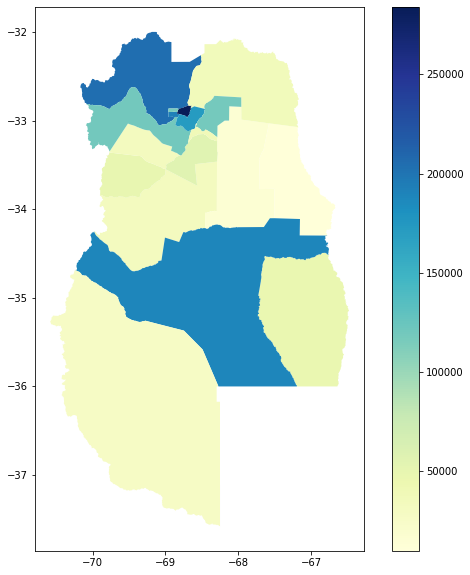

In [45]:
gdf_mendoza.plot(column = 'poblacion_2010',
         legend = True,
         figsize=(10, 10),
         cmap='YlGnBu',
        );

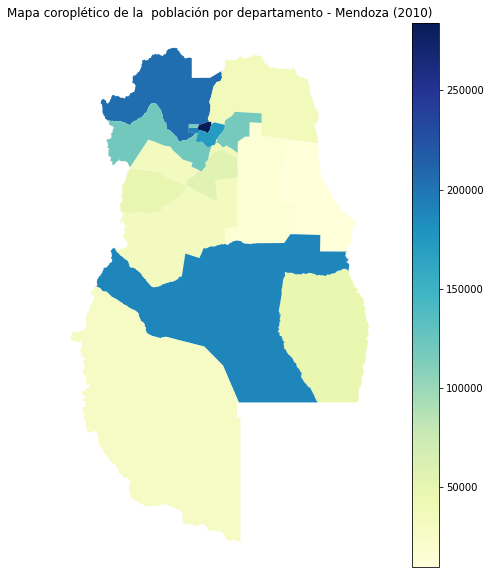

In [46]:
# Colormaps = https://matplotlib.org/stable/tutorials/colors/colormaps.html# plt.set_cmap('jet')
fig, ax = plt.subplots(figsize=(10, 10))

gdf_mendoza.plot(column = 'poblacion_2010',
             legend = True,
             cmap='YlGnBu',
             ax = ax
            );
ax.set(title='Mapa coroplético de la  población por departamento - Mendoza (2010)')

ax.set_axis_off()
plt.show()

#### Localidades censales 

https://datos.gob.ar/ar/dataset/jgm-servicio-normalizacion-datos-geograficos/archivo/jgm_8.9

Cargamos un csv con localidades censales. No es GDF, a pesar que contiene columnas con latitud y longitud, son columnas de un dataframe estandar.

In [47]:
localidades = pd.read_csv('https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.29/download/localidades-censales.csv')

In [48]:
localidades.head(3)

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,funcion,id,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad simple,-37.823387,-60.484640,6014.0,Adolfo Gonzales Chaves,INDEC,NaN,6014030,60014.0,Adolfo Gonzales Chaves,Juan E. Barra,6,Buenos Aires
1,Localidad simple,-37.625498,-58.746186,6063.0,Balcarce,INDEC,NaN,6063030,60063.0,Balcarce,Napaleofú,6,Buenos Aires
2,Localidad simple,-37.542635,-58.340719,6063.0,Balcarce,INDEC,NaN,6063040,60063.0,Balcarce,Ramos Otero,6,Buenos Aires


Nos quedamos sólo con los registros de Mendoza

In [50]:
localidades = localidades.loc[localidades['provincia_nombre']=='Mendoza']

Y con tres columnas. La latitud y longitud del centroide de la localidad, y su nombre.

In [51]:
localidades = localidades[['centroide_lat','centroide_lon', 'nombre']]

In [52]:
localidades.head()

,centroide_lat,centroide_lon,nombre
2053,-32.886969,-68.854308,Mendoza
2054,-35.000912,-67.516182,Bowen
2055,-35.144906,-67.662955,Carmensa
2056,-34.980469,-67.700995,General Alvear
2057,-34.979260,-67.659089,Los Compartos


Ahora convertimos el dataframe tradicional en un GDF, indicandole que columna indica la latitud, y cual la longitud.

In [53]:
gdf_localidades = gpd.GeoDataFrame(localidades, 
                                   geometry=gpd.points_from_xy(localidades['centroide_lon'], 
                                                               localidades['centroide_lat']),
                                   crs='EPSG:4326')

In [54]:
gdf_localidades.head(3)

,centroide_lat,centroide_lon,nombre,geometry
2053,-32.886969,-68.854308,Mendoza,POINT (-68.85431 -32.88697)
2054,-35.000912,-67.516182,Bowen,POINT (-67.51618 -35.00091)
2055,-35.144906,-67.662955,Carmensa,POINT (-67.66296 -35.14491)


<AxesSubplot:>

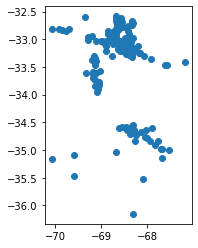

In [55]:
gdf_localidades.plot()

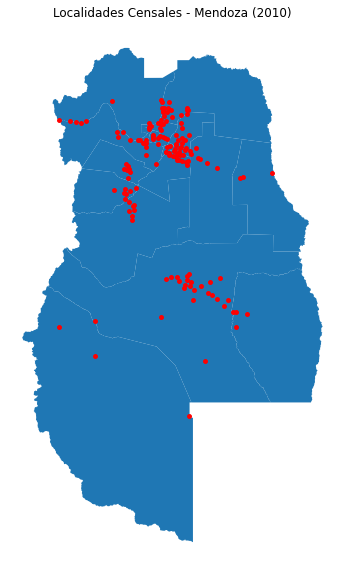

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_mendoza.plot(ax = ax);

gdf_localidades.plot(marker='o', color='red', markersize=15, ax = ax);

ax.set(title='Localidades Censales - Mendoza (2010)')

# Eliminamos los ejes
ax.set_axis_off()
plt.show()

### Contextily

http://darribas.org/gds19/content/labs/lab_03.html

In [ ]:
# !pip install contextily

In [62]:
import contextily as cx

In [63]:
gdf_mendoza_crs = gdf_mendoza.to_crs(epsg=3857)
gdf_loc = gdf_localidades.to_crs(epsg=3857)

In [64]:
gdf_mendoza

,gid,nam,geometry,departamento,poblacion_2010,Superficie_km2,densidad,distritos,concejales
0,220,Las Heras,"MULTIPOLYGON (((-69.12645 -32.00191, -69.12570...",Las Heras,203666,8955,22.74,14,12
1,213,San Carlos,"MULTIPOLYGON (((-68.45348 -34.21255, -68.45584...",San Carlos,32631,11 578,2.82,6,10
2,214,Tunuyán,"MULTIPOLYGON (((-68.99859 -33.54164, -68.99862...",Tunuyán,49458,3317,14.91,12,10
3,92,Tupungato,"MULTIPOLYGON (((-68.79835 -33.39054, -68.79835...",Tupungato,32524,2485,13.09,13,10
4,52,Santa Rosa,"MULTIPOLYGON (((-67.95776 -32.84504, -67.95774...",Santa Rosa,16374,8510,1.92,6,10
5,53,Rivadavia,"MULTIPOLYGON (((-68.28922 -33.23243, -68.29025...",Rivadavia,56373,2141,26.33,13,10
6,55,La Paz,"MULTIPOLYGON (((-67.17696 -33.07321, -67.17605...",La Paz,10012,7105,1.41,6,10
7,111,General Alvear,"MULTIPOLYGON (((-66.75741 -34.51179, -66.75688...",General Alvear,46429,14 448,3.21,4,10
8,113,San Rafael,"MULTIPOLYGON (((-66.77655 -34.29767, -66.77665...",San Rafael,188018,31 235,6.02,18,12
9,215,Luján de Cuyo,"MULTIPOLYGON (((-68.86869 -32.96118, -68.86828...",Luján de Cuyo,119888,4847,24.73,15,12[17]​


In [65]:
# Filtramos departamentos del Gran Mendoza: Capital, Godoy Cruz, Guaymallén , Las Heras, Lavalle, Luján y Maipú
gdf_dep_gm = gdf_mendoza.loc[(gdf_mendoza['nam']=='Las Heras') | 
                             (gdf_mendoza['nam']=='Capital') | 
                             (gdf_mendoza['nam']=='Godoy Cruz') |
                             (gdf_mendoza['nam']=='Guaymallén') |
                             (gdf_mendoza['nam']=='Lavalle') |
                             (gdf_mendoza['nam']=='Luján de Cuyo') |
                             (gdf_mendoza['nam']=='Maipú')]




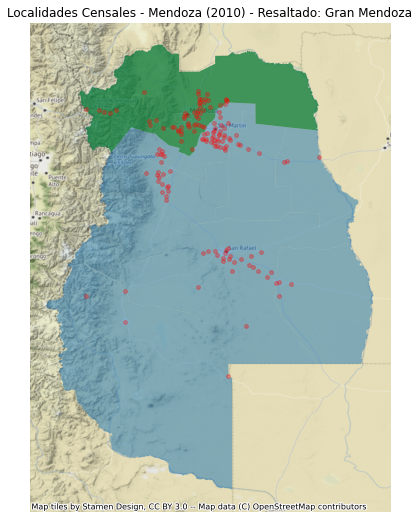

In [66]:
f, ax = plt.subplots(1, figsize=(9, 9))

gdf_mendoza.plot(ax = ax, alpha=0.5)
gdf_dep_gm.plot(ax=ax, facecolor = 'green', alpha = 0.5)
gdf_localidades.plot(alpha=0.3, marker='o', color='red', markersize=15, ax=ax)

cx.add_basemap(ax, crs=gdf_localidades.crs)

ax.set(title='Localidades Censales - Mendoza (2010) - Resaltado: Gran Mendoza');
ax.set_axis_off()


### Geocoding

[Documentacion](https://automating-gis-processes.github.io/site/notebooks/L3/geocoding_in_geopandas.html)

Que ocurre si no tenés la latitud y la longitud de los puntos que queremos marcar, pero si su dirección postal?

Podemos utilizar algún servicio de _geocodificación_, al cual le pasamos las direcciones lo mas completas posibles, y nos devuelve la latitud y la longitud del punto.

Geopandas tiene una herramienta para eso, que permite utilizar varios servicios como nominatim, google, bing, yahoo, y openmapquest.

Nosotrs vamos a utilizar el servicio de `nominatim` ([link](https://nominatim.org)), que se basa en [OpenStreetMap](https://www.openstreetmap.org) para geocodificar.

Existen otros paquete que prestan servicios similares, con una mayor cantidad de proveedores gratuitos o pagos, como [geocoder](https://geocoder.readthedocs.io/)

In [2]:
from geopandas.tools import geocode

In [3]:
tabla = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Universidades_nacionales_de_Argentina', header = 1)

In [7]:
tabla[0]

,Nombre,Acrónimo,Dirección,Ciudad,Provincia,Otras sedes,Sitio oficial,Estudiantes (2019)[9]​,Creación
0,Universidad de Buenos Aires,UBA,Viamonte 430,Buenos Aires,Ciudad de Buenos Aires,NaN,www.uba.ar,318935.0,1821
1,Universidad de la Defensa Nacional,UNDEF,Maipú 262,Buenos Aires,Ciudad de Buenos Aires,NaN,www.undef.edu.ar,6682.0,2014
2,Universidad Nacional Almirante Guillermo Brown,UNAB,Av. Tomás Espora 4320,Burzaco,Buenos Aires,NaN,www.unab.edu.ar,267.0,2016
3,Universidad Nacional Arturo Jauretche,UNAJ,Av. San Martín 2002,Florencio Varela,Buenos Aires,"Castelli, Lobos, Brandsen",www.unaj.edu.ar,24900.0,2009
4,Universidad Nacional de Avellaneda,UNDAV,España 350 esq. Colón,Avellaneda,Buenos Aires,Piñeyro,www.undav.edu.ar,17019.0,2009
5,Universidad Nacional de Catamarca,UNCa,Esquiú 612,Catamarca,Catamarca,NaN,www.unca.edu.ar,15237.0,1972
6,Universidad Nacional de Chilecito,UNChiUNdeC,9 de Julio 22,Chilecito,La Rioja,NaN,www.undec.edu.ar,3453.0,2002
7,Universidad Nacional de Córdoba,UNC,Haya de la Torre s/nPabellón Argentina,Córdoba,Córdoba,NaN,www.unc.edu.ar,151846.0,1613
8,Universidad Nacional de Cuyo,UNCuUNCuyo,Centro Universitario,Mendoza,Mendoza,NaN,www.uncu.edu.ar,35621.0,1939
9,Universidad Nacional de Entre Ríos,UNER,Eva Perón 24,Concepción del Uruguay,Entre Ríos,"Concordia, Gualeguaychú, Oro Verde, Paraná, Vi...",www.uner.edu.ar,19370.0,1973


In [70]:
universidades = tabla[0]

In [71]:
universidades

,Nombre,Acrónimo,Dirección,Ciudad,Provincia,Otras sedes,Sitio oficial,Estudiantes (2019)[9]​,Creación
0,Universidad de Buenos Aires,UBA,Viamonte 430,Buenos Aires,Ciudad de Buenos Aires,NaN,www.uba.ar,318935.0,1821
1,Universidad de la Defensa Nacional,UNDEF,Maipú 262,Buenos Aires,Ciudad de Buenos Aires,NaN,www.undef.edu.ar,6682.0,2014
2,Universidad Nacional Almirante Guillermo Brown,UNAB,Av. Tomás Espora 4320,Burzaco,Buenos Aires,NaN,www.unab.edu.ar,267.0,2016
3,Universidad Nacional Arturo Jauretche,UNAJ,Av. San Martín 2002,Florencio Varela,Buenos Aires,"Castelli, Lobos, Brandsen",www.unaj.edu.ar,24900.0,2009
4,Universidad Nacional de Avellaneda,UNDAV,España 350 esq. Colón,Avellaneda,Buenos Aires,Piñeyro,www.undav.edu.ar,17019.0,2009
5,Universidad Nacional de Catamarca,UNCa,Esquiú 612,Catamarca,Catamarca,NaN,www.unca.edu.ar,15237.0,1972
6,Universidad Nacional de Chilecito,UNChiUNdeC,9 de Julio 22,Chilecito,La Rioja,NaN,www.undec.edu.ar,3453.0,2002
7,Universidad Nacional de Córdoba,UNC,Haya de la Torre s/nPabellón Argentina,Córdoba,Córdoba,NaN,www.unc.edu.ar,151846.0,1613
8,Universidad Nacional de Cuyo,UNCuUNCuyo,Centro Universitario,Mendoza,Mendoza,NaN,www.uncu.edu.ar,35621.0,1939
9,Universidad Nacional de Entre Ríos,UNER,Eva Perón 24,Concepción del Uruguay,Entre Ríos,"Concordia, Gualeguaychú, Oro Verde, Paraná, Vi...",www.uner.edu.ar,19370.0,1973


In [72]:
universidades['addr'] = universidades['Dirección'] + ', ' + universidades['Ciudad'] + ', ' + universidades['Provincia'] + ', Argentina'

In [73]:
universidades.columns

Index(['Nombre', 'Acrónimo', 'Dirección', 'Ciudad', 'Provincia', 'Otras sedes',
       'Sitio oficial', 'Estudiantes (2019)[9]​', 'Creación', 'addr'],
      dtype='object')

In [74]:
universidades = universidades[['Nombre', 'Acrónimo', 'addr']]

In [75]:
universidades.head(3)

,Nombre,Acrónimo,addr
0,Universidad de Buenos Aires,UBA,"Viamonte 430, Buenos Aires, Ciudad de Buenos A..."
1,Universidad de la Defensa Nacional,UNDEF,"Maipú 262, Buenos Aires, Ciudad de Buenos Aire..."
2,Universidad Nacional Almirante Guillermo Brown,UNAB,"Av. Tomás Espora 4320, Burzaco, Buenos Aires, ..."


Geocodificamos las direcciones con Nominatim. En el parámetro `user_agent` se debería poner el nombre de la app a modo de descripción.

In [76]:
geo = geocode(universidades['addr'], provider='nominatim', user_agent='test_flacso', timeout=4)

In [79]:
geo

,geometry,address
0,POINT (-58.37312 -34.59977),"430, Viamonte, Microcentro, San Nicolás, Bueno..."
1,POINT (-58.37663 -34.60514),"262, Maipú, Microcentro, San Nicolás, Buenos A..."
2,GEOMETRYCOLLECTION EMPTY,None
3,POINT (-58.28136 -34.77437),"Avenida San Martín, San Emilio, Florencio Vare..."
4,GEOMETRYCOLLECTION EMPTY,None
5,POINT (-65.76807 -28.46589),"Esquiú, Jardín, Jorge Bermudez, San Fernando d..."
6,POINT (-67.49450 -29.16495),"22, 9 de Julio, Barrio Mayo, Chilecito, Depart..."
7,GEOMETRYCOLLECTION EMPTY,None
8,POINT (-68.47269 -33.20158),"Centro universitario Rivadavia, Jose Hernandez..."
9,GEOMETRYCOLLECTION EMPTY,None


"al costado" de la base de universidades, le pegamos los parametros geolocalizados mediante un `join`

In [80]:
gdf_uni = geo.join(universidades)

In [81]:
type(gdf_uni)

geopandas.geodataframe.GeoDataFrame

Graficamos las universidades:

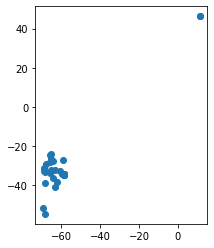

In [82]:
gdf_uni.plot();

Vamos a graficar la capa universidades arriba de la capa de límites provinciales.

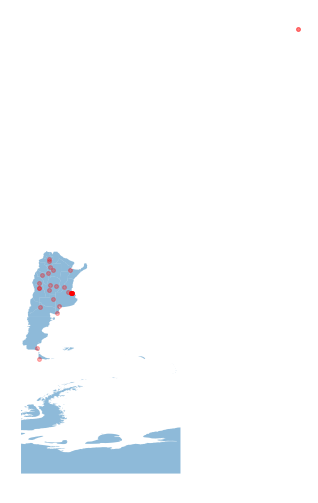

In [83]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf_prov.plot(ax = ax, alpha=0.5)
# dep.plot(ax=ax, facecolor = 'green', alpha = 0.5)
gdf_uni.plot(alpha=0.3, marker='o', color='red', markersize=15, ax=ax)

ax.set_axis_off();

Claramente un punto no se logró geocodificar correctamente, devolviendo valores erroneos de lat y lon para la dirección registrada. Existe algunas formas de lidiar con esto:

#### **Acotando el mapa a la superficie del mapa de Argentina (es todo el cuadro, no sólo el territorio):**

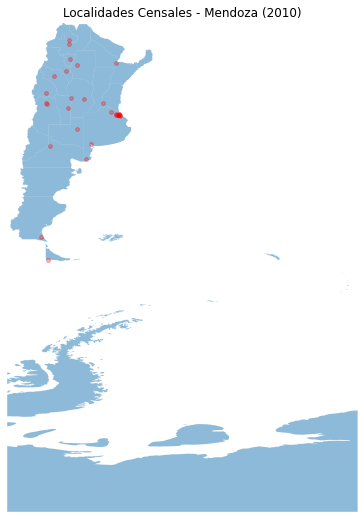

In [84]:
f, ax = plt.subplots(1, figsize=(9, 9))

# Graficamos las provincias
gdf_prov.plot(ax = ax, alpha=0.5)

# Graficamos las universidades
gdf_uni.plot(alpha=0.3, marker='o', color='red', markersize=15, ax=ax)

# Titulo
ax.set(title='Localidades Censales - Mendoza (2010)')

# Limites del mapa de provincias
ax.set_ylim(gdf_prov.bounds.miny.min(), gdf_prov.bounds.maxy.max())
ax.set_xlim(gdf_prov.bounds.minx.min(), gdf_prov.bounds.maxx.max())

# Borramos los ejes
ax.set_axis_off();

El punto que estaba fuera de Argentina sigue estando en el geodataframe de las universidades, pero no lo mostramos porque está fuera de los límites del mapa de provincias. Para tener una solución definitiva deberíamos eliminarlo del GDF. 
Podemos hacerlo teniendo en cuenta que su latitud y su longitud están por afuera de los límites del mapa de Argentina

In [85]:
# Limites del mapa de Argentina
prov_miny = gdf_prov.bounds.miny.min()
prov_maxy = gdf_prov.bounds.maxy.max()
prov_minx = gdf_prov.bounds.minx.min()
prov_maxx = gdf_prov.bounds.maxx.max()

In [86]:
# Nos quedamos con las universidades geocodificadas, incluso con las que están fuera de los límites. 
# Pero eliminamos las que devolvieron Nan
gdf_uni = gdf_uni.loc[gdf_uni['address'].notna()]

In [87]:
gdf_uni

,geometry,address,Nombre,Acrónimo,addr
0,POINT (-58.37312 -34.59977),"430, Viamonte, Microcentro, San Nicolás, Bueno...",Universidad de Buenos Aires,UBA,"Viamonte 430, Buenos Aires, Ciudad de Buenos A..."
1,POINT (-58.37663 -34.60514),"262, Maipú, Microcentro, San Nicolás, Buenos A...",Universidad de la Defensa Nacional,UNDEF,"Maipú 262, Buenos Aires, Ciudad de Buenos Aire..."
3,POINT (-58.28136 -34.77437),"Avenida San Martín, San Emilio, Florencio Vare...",Universidad Nacional Arturo Jauretche,UNAJ,"Av. San Martín 2002, Florencio Varela, Buenos ..."
5,POINT (-65.76807 -28.46589),"Esquiú, Jardín, Jorge Bermudez, San Fernando d...",Universidad Nacional de Catamarca,UNCa,"Esquiú 612, Catamarca, Catamarca, Argentina"
6,POINT (-67.49450 -29.16495),"22, 9 de Julio, Barrio Mayo, Chilecito, Depart...",Universidad Nacional de Chilecito,UNChiUNdeC,"9 de Julio 22, Chilecito, La Rioja, Argentina"
8,POINT (-68.47269 -33.20158),"Centro universitario Rivadavia, Jose Hernandez...",Universidad Nacional de Cuyo,UNCuUNCuyo,"Centro Universitario, Mendoza, Mendoza, Argentina"
14,POINT (-58.74525 -34.52117),"Universidad Nacional de José Clemante Paz, 473...",Universidad Nacional de José C. Paz,UNJPUNPAZ,"Leandro N. Alem 4731, José C. Paz, Buenos Aire..."
15,POINT (-65.32194 -24.18106),"Avenida Bolivia, Regimiento de Infanteria de M...",Universidad Nacional de Jujuy,UNJu,"Av. Bolivia 1239, San Salvador de Jujuy, Jujuy..."
16,POINT (-58.56288 -34.67011),"1903, Florencio Varela, San Justo, Partido de ...",Universidad Nacional de La Matanza,UNLMUNLaM,"Florencio Varela 1903, San Justo, Buenos Aires..."
17,POINT (-64.28942 -36.62042),"Universidad Nacional de La Pampa, 353, Coronel...",Universidad Nacional de La Pampa,UNLPam,"Coronel Gil 353, Santa Rosa, La Pampa, Argentina"


In [88]:
# Creamos un campo lon y lat para cada universidad, para comparar con los limites del mapa.
# Simplemente tomamos el valor x e y de la columna geometry (esto es posible porque es un geodataframe)
gdf_uni['lon'] = gdf_uni['geometry'].x
gdf_uni['lat'] = gdf_uni['geometry'].y

/home/mato/miniconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/mato/miniconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [89]:
# Filtramos los que tienen una longitud mayor al límite
gdf_uni.loc[gdf_uni['lon']>prov_maxx]

,geometry,address,Nombre,Acrónimo,addr,lon,lat
45,POINT (11.04803 46.31448),"Nanno, Ville d'Anaunia, Comunità della Val di ...",Universidad Nacional del Alto Uruguay,UNAU,NaN,11.048029,46.314475
54,POINT (11.04803 46.31448),"Nanno, Ville d'Anaunia, Comunità della Val di ...",Universidad Nacional Raúl Scalabrini Ortiz,UNSO,NaN,11.048029,46.314475


In [90]:
# Nos quedamos con el resto de los puntos, salvo los dos que están fuera del límite..
gdf_uni = gdf_uni.loc[gdf_uni['lon']<prov_maxx]

In [91]:
# Guardamos el GDF de las universidades como GDF (no como DF)
gdf_uni.to_file('data/uni.geojson', driver='GeoJSON')  

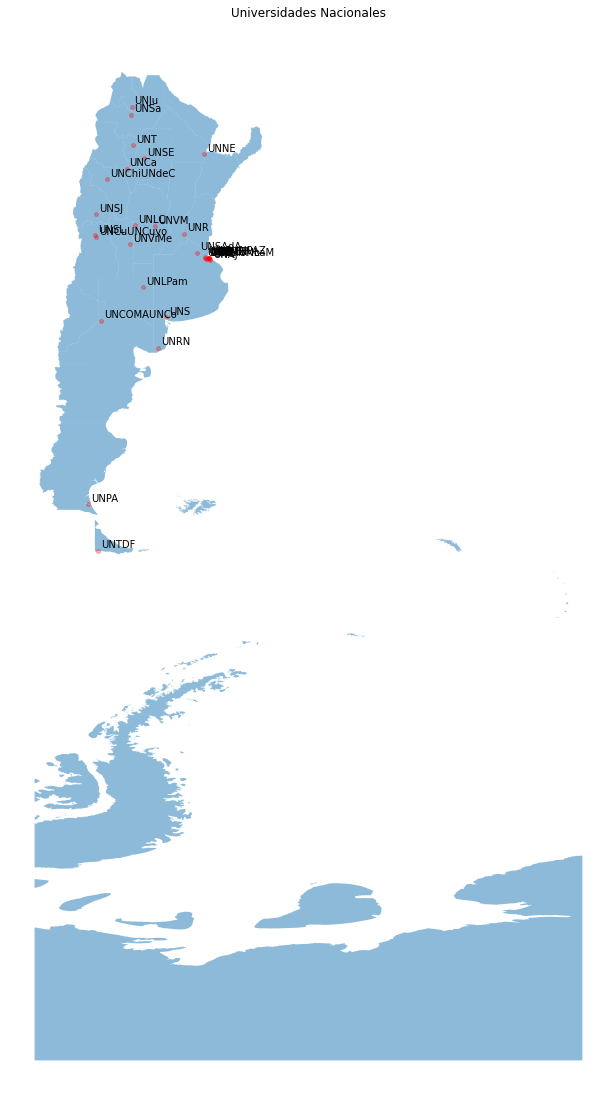

In [93]:
f, ax = plt.subplots(1, figsize=(30, 20))

# Graficamos las provincias
gdf_prov.plot(ax = ax, alpha=0.5)

# Graficamos las universidades
gdf_uni.plot(alpha=0.3, marker='o', color='red', markersize=15, ax=ax)

# Titulo
ax.set(title='Universidades Nacionales')

# Marcamos cada punto con su acrónimo
for x, y, label in zip(gdf_uni['geometry'].x, gdf_uni['geometry'].y, gdf_uni['Acrónimo']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


# Borramos los ejes
ax.set_axis_off();

### Buffers

El análisis de buffers es una importante tarea en el geoprocesamiento. Se utiliza para obtener una distancia alrededor de un punto. 

En este ejemplo, crearemos un buffer alrededor de cada universidad, como proxy de la zona de influencia.

Es necesario saber qué CRS/proyección se está utilizando para obtener el resultado correcto. Necesitamos usar una proyección que mida en metros, no en grados ni en ninguna otra alternativa. Este es un error clásico en el mundo de Geodata.

En una primera aproximación, vamos a seguir trabajando con los puntos localizados en Mendoza Capital.

In [94]:
gdf_uni = gpd.read_file('https://raw.githubusercontent.com/matog/Flacso_ciencia_de_datos_python_2022/main/Clase4/data/uni.geojson')

In [95]:
gdf_caba = gpd.read_file('https://raw.githubusercontent.com/mgaitan/departamentos_argentina/master/departamentos-ciudad_autonoma_de_buenos_aires.json')

<AxesSubplot:>

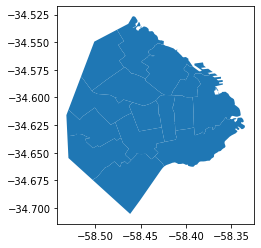

In [96]:
gdf_caba.plot()

In [97]:
gdf_uba = gdf_uni.loc[gdf_uni['Acrónimo']=='UBA']

In [98]:
gdf_uba

,address,Nombre,Acrónimo,addr,lon,lat,geometry
0,"430, Viamonte, San Nicolás, Buenos Aires, Comu...",Universidad de Buenos Aires,UBA,"Viamonte 430, Buenos Aires, Ciudad de Buenos A...",-58.373123,-34.599771,POINT (-58.37312 -34.59977)


In [99]:
gdf_uba.crs = {"init": "EPSG:4326"}
gdf_caba.crs = {"init": "EPSG:4326"}
gdf_uba = gdf_uba.to_crs(epsg = 5343)
gdf_caba = gdf_caba.to_crs(epsg = 5343)

/home/mato/miniconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Podemos crear un buffer para todos los registros del GDF (aunque en este caso tenemos solo la UBA), creando una columna para ese fin. El buffer se mide en unidades de medida de del sistema de coordenadas que estemos utilizando en la capa:

In [100]:
gdf_uba['buffer'] = gdf_uba['geometry'].buffer(1500)

In [101]:
gdf_uba

,address,Nombre,Acrónimo,addr,lon,lat,geometry,buffer
0,"430, Viamonte, San Nicolás, Buenos Aires, Comu...",Universidad de Buenos Aires,UBA,"Viamonte 430, Buenos Aires, Ciudad de Buenos A...",-58.373123,-34.599771,POINT (2754166.837 6086123.863),"POLYGON ((2755666.837 6086123.863, 2755659.614..."


O podemos crear varios buffer individuales para el mismo punto:

In [102]:
uba_300 = gdf_uba.buffer(300)
uba_800 = gdf_uba.buffer(800)
uba_1000 = gdf_uba.buffer(1000)

In [103]:
uba_300

0    POLYGON ((2754466.837 6086123.863, 2754465.393...
dtype: geometry

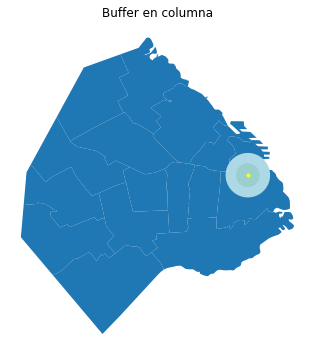

In [104]:
fig, ax = plt.subplots(figsize=(8,6))

gdf_caba.plot(ax=ax)

gdf_uba['buffer'].plot(ax=ax, color='lightblue')
uba_800.plot(ax=ax, color='green', alpha = 0.1)
gdf_uba.plot(ax=ax, color='yellow', markersize=10); # Universidad

ax.set(title='Buffer en columna')

ax.set_axis_off();

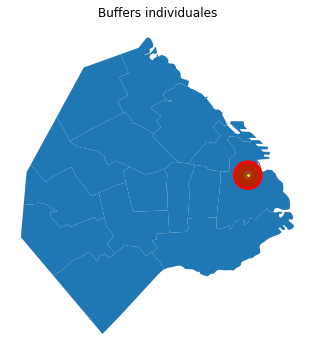

In [105]:
fig, ax = plt.subplots(figsize=(8,6))

gdf_caba.plot(ax=ax)

# Ordenas los buffers de los mas amplios al los mas pequeños, para que los grandes no tapen a los chicos. 
# O ajustar el alpha, que genera transparencia
uba_1000.plot(ax=ax, color='red')
uba_800.plot(ax=ax, color='green', alpha = 0.3)
uba_300.plot(ax=ax, color='gray', alpha = 0.3) # Este buffer es tapado por el punto amarillo de la UBA

gdf_uba.plot(ax=ax, color='yellow', markersize=3); # Universidad
ax.set(title='Buffers individuales')

ax.set_axis_off();

Nos quedamos con las provincias de Mendoza, San Juan, San Luis y La Rioja, sólo a efectos prácticos y para mejorar la visualización de la información

In [106]:
gdf_prov_sel = gdf_prov.loc[(gdf_prov['nam']=='Mendoza') | 
                    (gdf_prov['nam']=='San Juan') | 
                    (gdf_prov['nam']=='San Luis') | 
                    (gdf_prov['nam']=='La Rioja')]

Acá viene un paso clave. Tenemos que convertir los sistemas de coordenadas de referencias a uno que mida distancias en metros (no en grados, ni ninguna otra medida), para poder definir el buffer en metros. Para eso, primero con `init` definimos un sistema de inicio, y con `to_crs`  lo convertimos al epsg 5343, que mide distancias en metros.
Esto debemos correrlos una sola vez, porque si lo corremos dos veces, borramos la información de `geometry`. Si asi ocurriese, volvemos a cargar el GDF.

In [107]:
gdf_uni.crs = {"init": "EPSG:4326"}
gdf_prov_sel.crs = {"init": "EPSG:4326"}
gdf_uni = gdf_uni.to_crs(epsg = 5343)
gdf_prov_sel = gdf_prov_sel.to_crs(epsg = 5343)

/home/mato/miniconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [108]:
# Chequeamos que la información de geometry esté ok
gdf_uni.head(3)

,address,Nombre,Acrónimo,addr,lon,lat,geometry
0,"430, Viamonte, San Nicolás, Buenos Aires, Comu...",Universidad de Buenos Aires,UBA,"Viamonte 430, Buenos Aires, Ciudad de Buenos A...",-58.373123,-34.599771,POINT (2754166.837 6086123.863)
1,"262, Maipú, San Nicolás, Buenos Aires, Comuna ...",Universidad de la Defensa Nacional,UNDEF,"Maipú 262, Buenos Aires, Ciudad de Buenos Aire...",-58.376629,-34.605139,POINT (2753759.287 6085567.249)
2,"Avenida San Martín, San Emilio, Florencio Vare...",Universidad Nacional Arturo Jauretche,UNAJ,"Av. San Martín 2002, Florencio Varela, Buenos ...",-58.281357,-34.774374,POINT (2759950.333 6065386.799)


Como queremos generar un buffer para cada universidad, generemos una columna.

In [109]:
gdf_uni['buffer'] = gdf_uni['geometry'].buffer(30000)

In [110]:
gdf_prov_sel

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
2,3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((2005183.431 6456459.783, 20105..."
4,5,0.0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((2134525.261 6650268.607, 21263..."
11,12,0.0,Provincia,Provincia de Mendoza,Provincia,Mendoza,50,Geografía,IGN,"MULTIPOLYGON (((1940807.474 6408091.085, 19408..."
14,15,0.0,Provincia,Provincia de San Juan,Provincia,San Juan,70,Geografía,IGN,"MULTIPOLYGON (((1732320.285 6857608.694, 17323..."


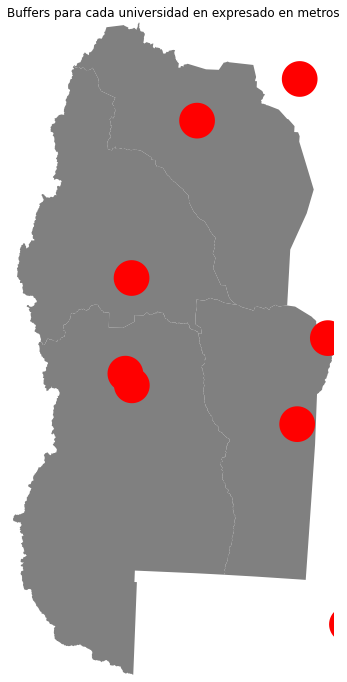

In [112]:
fig, ax = plt.subplots(figsize=(20,12))
# cx.add_basemap(ax, crs='epsg:5343')

# prov.plot(ax=ax, color = 'gray')
gdf_prov_sel.plot(ax=ax, color = 'gray')

gdf_uni['buffer'].plot(ax=ax, color='red')

# Limites del mapa de provincias
ax.set_ylim(gdf_prov_sel.bounds.miny.min(), gdf_prov_sel.bounds.maxy.max())
ax.set_xlim(gdf_prov_sel.bounds.minx.min(), gdf_prov_sel.bounds.maxx.max())

ax.set(title='Buffers para cada universidad en expresado en metros')


# Borramos los ejes
ax.set_axis_off();

Link a documentación de cmpa: https://geopandas.org/en/stable/docs/user_guide/mapping.html

Por mas que hayamos cortado el gráfico según los límites de la capa provincia, quedan algunos puntos que deberíamos borrarlos. Ahora exploraremos operaciones para hacerlo

### Overlays y Spatial Joins 

La principal diferencia entre `spatial join` y `overlay` es que el primer mezcla (_merge_) atributos de otro `geodataframe` a la geometría existente y el segundo, crea una nueva geometría (intersercción, diferencia, etc)

#### Overlays 

https://geopandas.org/en/stable/docs/user_guide/set_operations.html

In [113]:
gdf_uni_buffer = gpd.GeoDataFrame()
gdf_uni_buffer['geometry'] = gdf_uni['buffer']

<AxesSubplot:>

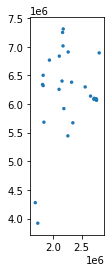

In [114]:
gdf_uni_buffer.plot()

In [115]:
overlay_prov_inter = gpd.overlay(gdf_uni_buffer, gdf_prov_sel, how='intersection')

ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [ ]:
overlay_prov_inter.head()

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))

# gdf_prov_sel.plot(ax=ax, color = 'gray', edgecolor='k', cmap='tab10')
overlay_prov_inter.plot(ax = ax, color = 'green')

# Borramos los ejes
ax.set_axis_off();


In [ ]:
overlay_prov_diff = gpd.overlay(gdf_prov_sel, gdf_uni_buffer, how='difference')

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))

overlay_prov_diff.plot(ax = ax, color = 'red')

# Borramos los ejes
ax.set_axis_off();
plt.savefig('books_read.png')


In [ ]:
gdf_prov_sel.plot()

In [ ]:
gdf_prov_sel_disolve = gdf_prov_sel.dissolve()

In [ ]:
gdf_prov_sel_disolve.plot()

In [ ]:
localidades = pd.read_csv('https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.29/download/localidades-censales.csv')

In [ ]:
localidades = localidades[['centroide_lat','centroide_lon', 'nombre']]

In [ ]:
gdf_localidades = gpd.GeoDataFrame(localidades, 
                                   geometry=gpd.points_from_xy(localidades['centroide_lon'], 
                                                               localidades['centroide_lat']),
                                   crs='EPSG:4326')

In [ ]:
gdf_localidades.crs = {"init": "EPSG:4326"}
gdf_localidades = gdf_localidades.to_crs(epsg = 5343)
# prov_sel_disolve.crs = {"init": "EPSG:4326"}
# prov_sel_disolve = prov_sel_disolve.to_crs(epsg = 5343)

In [ ]:
gdf_localidades.head(3)

#### Spatial Joins 

In [116]:
s_join = gdf_localidades.sjoin(gdf_prov_sel_disolve, how="inner", predicate='intersects')

NameError: name 'gdf_prov_sel_disolve' is not defined

In [ ]:
s_join

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))

gdf_prov_sel_disolve.plot(ax=ax, color = 'gray', alpha = 0.6)
s_join.plot(ax=ax, color = 'red', alpha = 0.5)

# Borramos los ejes
ax.set_axis_off();

Ahora vamos a pegarle a estos puntos que están en mendoza, el nombre del departamento. Ya está en el GDF esa info, por lo que la vamos a borrar, y buscar en la capa de departamentos con un `spatial_join`.

In [ ]:
gdf_depart = gpd.read_file('https://github.com/matog/Flacso_ciencia_de_datos_python_2022/blob/main/Clase4/data/departamento.zip?raw=true')

In [ ]:
gdf_depart.crs = {"init": "EPSG:4326"}
gdf_depart = gdf_depart.to_crs(epsg = 5343)

Nos quedamos solo con el campo geometry, que tiene la lat y lon de cada punto. A ese campo, le vamos a pegar el resto de la info de la capa de departamentos

In [ ]:
s_join = s_join[['geometry']]

In [ ]:
# Solo quedo la columna necesaria para el spatial join
s_join

In [ ]:
gdf_depar_join = s_join.sjoin(gdf_depart, how="inner", predicate='intersects')

In [ ]:
gdf_depar_join

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))

gdf_depar_join.plot(ax=ax, color = 'gray', alpha = 0.6)
gdf_depart.plot(ax=ax, color = 'yellow', alpha = 0.5)

# Borramos los ejes
ax.set_axis_off();

In [ ]:
df.to_excel('nombre del archivo.xls', index = False)